In [1]:
%matplotlib inline

import pandas
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from sklearn import metrics

import tensorflow as tf
from tensorflow.contrib import layers
from tensorflow.contrib import learn

/Users/ipolosukhin/projects/tf_examples/.env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Sets logging to INFO to see all information from TensorFlow.

tf.logging.set_verbosity(tf.logging.INFO)

In [16]:
BASE_DIR = 'dropout_credit/'

In [120]:
# Load data.

train = pandas.read_csv('data/cs-training.csv', index_col=0)
y = train['SeriousDlqin2yrs']
X = train.copy().fillna(0)
X.pop('SeriousDlqin2yrs')
train_x, test_x, train_y, test_y = learn.estimators._sklearn.train_test_split(X, y, test_size=0.2, random_state=42)
mean_x, var_x = train_x.mean(), train_x.std()
train_x = (train_x - mean_x) / var_x
test_x = (test_x - mean_x) / var_x

train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [111]:
dnn_classifier = learn.DNNClassifier(hidden_units=[10, 10],
    feature_columns=[layers.real_valued_column('', dimension=10)], model_dir=BASE_DIR + 'dnn', enable_centered_bias=False)
dnn_classifier.fit(x=train_x, y=train_y, steps=2000, batch_size=128)

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=10, default_value=None, dtype=tf.float32)
INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Restored model from dropout_credit/dnn/model.ckpt-1000-?????-of-00001
INFO:tensorflow:Step 1001: loss = 0.385473
INFO:tensorflow:Saving checkpoints for 1001 into dropout_credit/dnn/model.ckpt.
INFO:tensorflow:Step 1101: loss = 0.374968
INFO:tensorflow:Step 1201: loss = 0.200694
INFO:tensorflow:Step 1301: loss = 0.265824
INFO:tensorflow:Saving checkpoints for 1301 into dropout_credit/dnn/model.ckpt.
INFO:tensorflow:Step 1401: loss = 0.276545
INFO:tensorflow:Step 1501: loss = 0.313495
INFO:tensorflow:Step 1601: loss = 0.178629
INFO:tensorflow:Saving checkpoints for 1601 into dropout_credit/dnn/model.ckpt.
INFO:tensorflow:Step 1701: loss = 0.199133
INFO:tensorflow:Step 1801: loss = 0.174248
INFO:tensorflow:Step 1901: loss = 0.24123
INFO:tensorflow:Saving checkpoints for 1901 into dropout_credit/dnn/model.ck

DNNClassifier(hidden_units=[10, 10], dropout=None, optimizer=None, feature_columns=[_RealValuedColumn(column_name='', dimension=10, default_value=None, dtype=tf.float32)])

In [112]:
pandas.DataFrame([dnn_classifier.evaluate(x=test_x, y=test_y)])

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=10, default_value=None, dtype=tf.float32)
INFO:tensorflow:Restored model from dropout_credit/dnn/model.ckpt-2000-?????-of-00001
INFO:tensorflow:Eval steps [0,inf) for training step 2000.
INFO:tensorflow:Input iterator is exhausted.
INFO:tensorflow:Saving evaluation summary for 2000 step: loss = 0.206852, auc = 0.794345, accuracy/threshold_0.500000_mean = 0.932567, labels/actual_target_mean = 0.0673333, recall/positive_threshold_0.500000_mean = 0.0341584, labels/prediction_mean = 0.0615701, accuracy/baseline_target_mean = 0.0673333, precision/positive_threshold_0.500000_mean = 0.489362, accuracy = 0.932567


,accuracy,accuracy/baseline_target_mean,accuracy/threshold_0.500000_mean,auc,global_step,labels/actual_target_mean,labels/prediction_mean,loss,precision/positive_threshold_0.500000_mean,recall/positive_threshold_0.500000_mean
0,0.932567,0.067333,0.932567,0.794345,2000,0.067333,0.06157,0.206852,0.489362,0.034158


In [153]:
def custom_dnn_model(feature, target):
    target = tf.one_hot(target, 2, 1.0, 0.0)
    feature = layers.fully_connected(feature, 30)
    feature = layers.fully_connected(feature, 30)
    logits = layers.fully_connected(feature, 2, activation_fn=None)
    loss = tf.contrib.losses.softmax_cross_entropy(logits, target, weight=tf.select(target == 1, 5.0, 1.0))
    train_op = layers.optimize_loss(
        loss, tf.contrib.framework.get_global_step(), learning_rate=0.05, 
        optimizer='Adagrad')
    predictions = tf.nn.softmax(logits)[:, 1]
    return predictions, loss, train_op

custom_dnn_classifier = learn.Estimator(model_fn=custom_dnn_model, model_dir=BASE_DIR + 'custom_dnn_weighted')
custom_dnn_classifier.fit(x=train_x, y=train_y, steps=2000, batch_size=128)

INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Step 1: loss = 0.615057
INFO:tensorflow:Step 101: loss = 0.425767
INFO:tensorflow:Step 201: loss = 0.194235
INFO:tensorflow:Saving checkpoints for 300 into dropout_credit/custom_dnn_weighted/model.ckpt.
INFO:tensorflow:Step 301: loss = 0.248439
INFO:tensorflow:Step 401: loss = 0.254526
INFO:tensorflow:Step 501: loss = 0.288615
INFO:tensorflow:Saving checkpoints for 600 into dropout_credit/custom_dnn_weighted/model.ckpt.
INFO:tensorflow:Step 601: loss = 0.167637
INFO:tensorflow:Step 701: loss = 0.181214
INFO:tensorflow:Step 801: loss = 0.156901
INFO:tensorflow:Saving checkpoints for 900 into dropout_credit/custom_dnn_weighted/model.ckpt.
INFO:tensorflow:Step 901: loss = 0.239568
INFO:tensorflow:Step 1001: loss = 0.200687
INFO:tensorflow:Step 1101: loss = 0.255807
INFO:tensorflow:Saving checkpoints for 1200 into dropout_credit/custom_dnn_weighted/model.ckpt.
INFO:tensorflow:Step 1201: loss = 0.203529
INFO:tensorflow:Step 1301: loss =

Estimator(params=None)

In [154]:
pandas.DataFrame([custom_dnn_classifier.evaluate(
            x=test_x, y=test_y,
            metrics={'auc': tf.contrib.metrics.streaming_auc})])

INFO:tensorflow:Restored model from dropout_credit/custom_dnn_weighted/model.ckpt-2000-?????-of-00001
INFO:tensorflow:Eval steps [0,inf) for training step 2000.
INFO:tensorflow:Input iterator is exhausted.
INFO:tensorflow:Saving evaluation summary for 2000 step: loss = 0.192983, auc = 0.822858


,auc,global_step,loss
0,0.822858,2000,0.192983


INFO:tensorflow:Loading model from checkpoint: dropout_credit/custom_dnn_weighted/model.ckpt-2000-?????-of-00001.


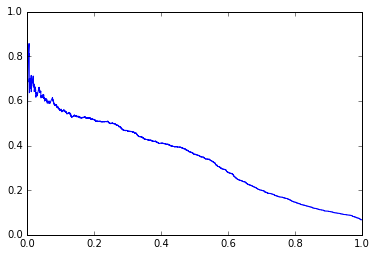

In [162]:
pred_prob_custom =  custom_dnn_classifier.predict(x=test_x)
th_custom, precision_custom, _ = metrics.precision_recall_curve(test_y, pred_prob_custom)
plt.plot(precision_custom, th_custom)

In [156]:
def uncertanty_dnn_model(feature, target, mode):
    target = tf.one_hot(target, 2, 1.0, 0.0)
    def get_logits(feature, is_training_or_sample):
        feature = layers.fully_connected(feature, 30)
        feature = layers.dropout(feature, 0.9, is_training=is_training_or_sample)
        feature = layers.fully_connected(feature, 30)
        feature = layers.dropout(feature, 0.9, is_training=is_training_or_sample)
        return layers.fully_connected(feature, 2, activation_fn=None)
    with tf.variable_scope('dnn'):
        logits = get_logits(feature, mode == learn.ModeKeys.TRAIN)
    with tf.variable_scope('dnn', reuse=True):
        sampled_logits = get_logits(feature, True)
    loss = tf.contrib.losses.softmax_cross_entropy(logits, target, weight=tf.select(target == 1, 5.0, 1.0))
    train_op = layers.optimize_loss(
        loss, tf.contrib.framework.get_global_step(), learning_rate=0.05, optimizer='Adagrad')
    predictions = {'classes': tf.argmax(logits, dimension=1), 
                   'probabilities': tf.nn.softmax(logits)[:, 1],
                   'sampled_probabilities': tf.nn.softmax(sampled_logits)[:, 1]}
    return predictions, loss, train_op

dropout_dnn_classifier = learn.Estimator(model_fn=uncertanty_dnn_model, model_dir=BASE_DIR + 'dnn_dropout_weighted')
dropout_dnn_classifier.fit(x=train_x, y=train_y, steps=2000, batch_size=128)

INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Restored model from dropout_credit/dnn_dropout_weighted/model.ckpt-3000-?????-of-00001
INFO:tensorflow:Step 3001: loss = 0.335652
INFO:tensorflow:Saving checkpoints for 3001 into dropout_credit/dnn_dropout_weighted/model.ckpt.
INFO:tensorflow:Step 3101: loss = 0.322858
INFO:tensorflow:Step 3201: loss = 0.174492
INFO:tensorflow:Step 3301: loss = 0.240518
INFO:tensorflow:Saving checkpoints for 3301 into dropout_credit/dnn_dropout_weighted/model.ckpt.
INFO:tensorflow:Step 3401: loss = 0.248162
INFO:tensorflow:Step 3501: loss = 0.294054
INFO:tensorflow:Step 3601: loss = 0.156227
INFO:tensorflow:Saving checkpoints for 3601 into dropout_credit/dnn_dropout_weighted/model.ckpt.
INFO:tensorflow:Step 3701: loss = 0.178422
INFO:tensorflow:Step 3801: loss = 0.183702
INFO:tensorflow:Step 3901: loss = 0.249266
INFO:tensorflow:Saving checkpoints for 3901 into dropout_credit/dnn_dropout_weighted/model.ckpt.
INFO:tensorflow:Step 4001: loss = 0.1997

Estimator(params=None)

In [157]:
pred_prob =  dropout_dnn_classifier.predict(x=test_x, outputs=['probabilities'])['probabilities']
pandas.DataFrame([{'auc': metrics.roc_auc_score(test_y, pred_prob)}])

INFO:tensorflow:Loading model from checkpoint: dropout_credit/dnn_dropout_weighted/model.ckpt-5000-?????-of-00001.


,auc
0,0.830772


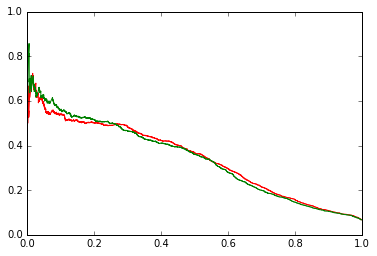

In [165]:
th, precision, recall = metrics.precision_recall_curve(test_y, pred_prob)
plt.plot(precision, th, c='r')
_ = plt.plot(precision_custom, th_custom, c='g')